In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
os.chdir(r"C:\Users\ghosa\Projects\ML\ass1\diabetes")

In [2]:
dataset = pd.read_csv('diabetes.data')
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [12]:
X=dataset.drop(['SEX','Y'],axis=1)
y=dataset['SEX']

In [13]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.4)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=10)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[55 37]
 [35 50]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.61      0.60      0.60        92
           2       0.57      0.59      0.58        85

    accuracy                           0.59       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.59      0.59      0.59       177



In [19]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_5 <= 41.50
|   |--- feature_2 <= 92.00
|   |   |--- feature_1 <= 28.95
|   |   |   |--- feature_3 <= 196.00
|   |   |   |   |--- feature_1 <= 22.85
|   |   |   |   |   |--- feature_1 <= 20.20
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  20.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  22.85
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  196.00
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  28.95
|   |   |   |--- class: 1
|   |--- feature_2 >  92.00
|   |   |--- feature_3 <= 188.50
|   |   |   |--- class: 2
|   |   |--- feature_3 >  188.50
|   |   |   |--- feature_3 <= 199.00
|   |   |   |   |--- feature_3 <= 192.50
|   |   |   |   |   |--- feature_2 <= 94.83
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  94.83
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  192.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  199.00
| 

In [21]:
from sklearn.tree import plot_tree

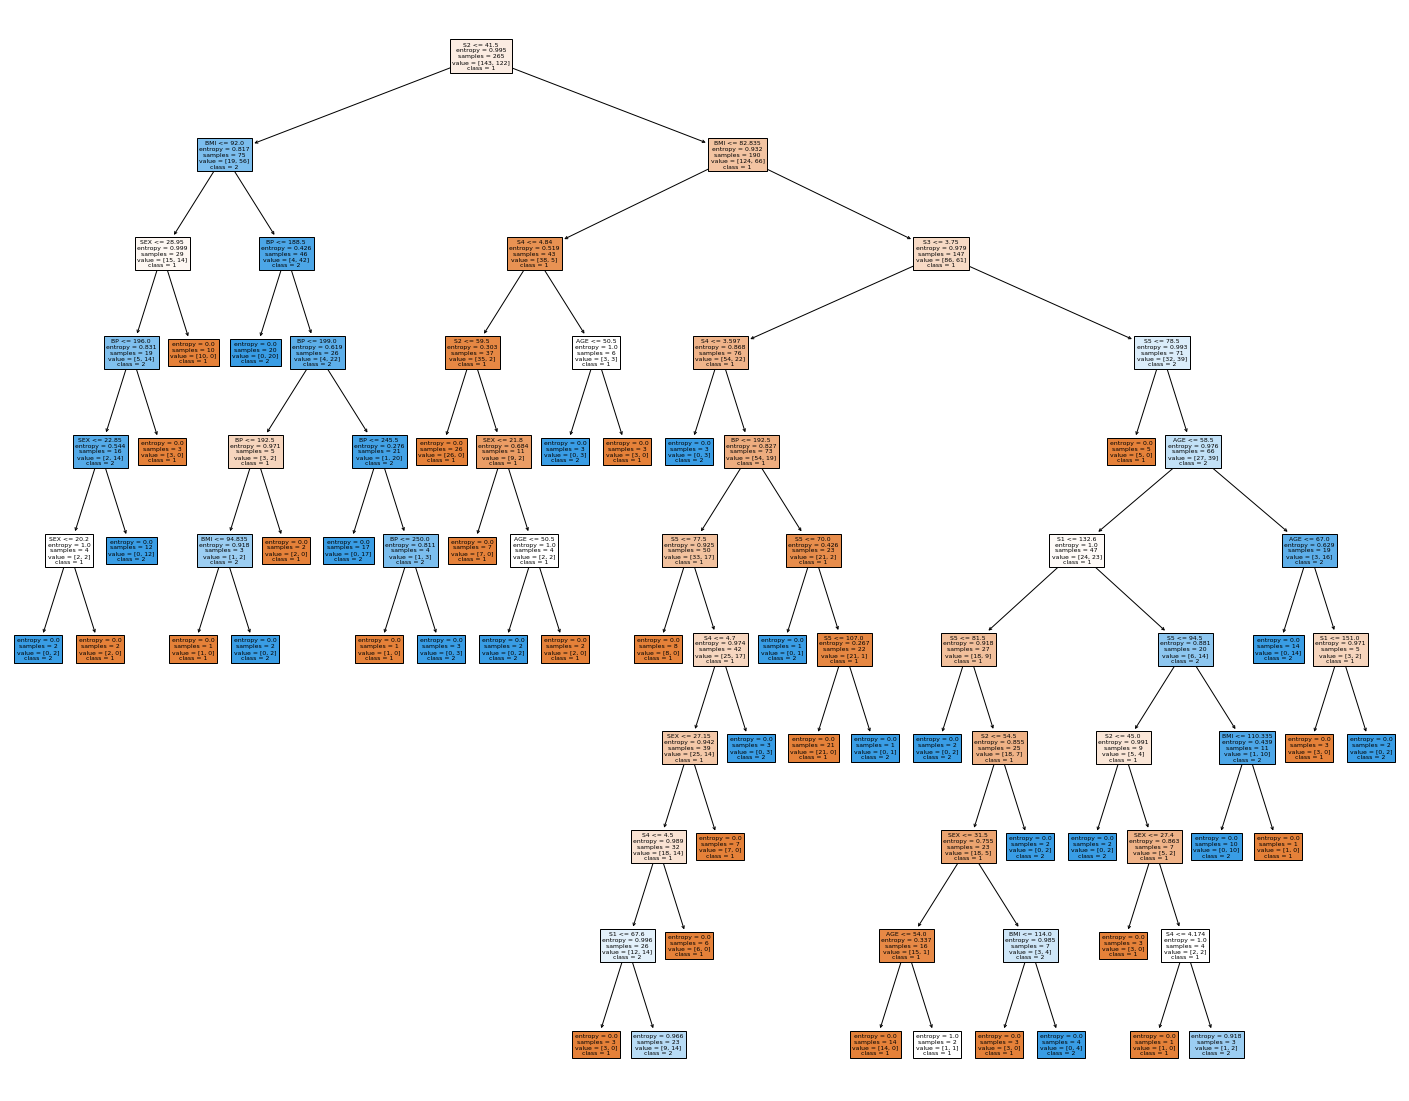

In [22]:
fig=plt.figure(figsize=(25,20))
fig=tree.plot_tree(decision_tree=classifier,feature_names=dataset.columns,class_names=['1','2'],filled=True)
plt.savefig("diabetes_1.jpg")